In [2]:
import pandas as pd
import numpy as np


In [73]:
df = pd.read_csv('C:/Users/ishwari/Desktop/ML Project/loan_data_1248_with_missing.csv')
df.head(10)

,income,loan_amount,term,credit_history,defaulted
0,60940.854754,17402.715471,60,1.0,1
1,49511.242579,6664.626123,36,0.0,0
2,63658.393686,17985.281393,60,0.0,1
3,79414.537415,21001.173770,36,1.0,0
4,47785.239255,4037.586145,36,1.0,0
5,NaN,18244.339419,36,1.0,0
6,NaN,23366.013955,60,1.0,1
7,65813.825125,8742.153888,60,1.0,0
8,43549.461053,26035.434321,36,1.0,1
9,61766.080785,18514.114056,60,1.0,0


In [17]:
df.shape


(164, 8)

In [18]:
df.columns.tolist()

['Age',
 'Gender',
 'Income',
 'Education',
 'Marital Status',
 'Number of Children',
 'Home Ownership',
 'Credit Score']

In [19]:
df.dtypes

Age                     int64
Gender                 object
Income                float64
Education              object
Marital Status         object
Number of Children      int64
Home Ownership         object
Credit Score           object
dtype: object

In [20]:
df.isnull().sum()

Age                   0
Gender                3
Income                2
Education             4
Marital Status        3
Number of Children    0
Home Ownership        5
Credit Score          3
dtype: int64

In [77]:
df.fillna({'income': df['income'].mode()[0]}, inplace=True)
df.fillna({'loan_amount': df['loan_amount'].mode()[0]}, inplace=True)
df.fillna({'term': df['term'].mode()[0]}, inplace=True)
df.fillna({'credit history': df['credit_history'].mode()[0]}, inplace=True)
df.fillna({'defaulted': df['defaulted'].mode()[0]}, inplace=True)

In [78]:
df.isnull().sum()

income              0
loan_amount         0
term                0
credit_history    112
defaulted           0
dtype: int64

In [79]:
df.describe()

,income,loan_amount,term,credit_history,defaulted
count,1248.000000,1248.000000,1248.000000,1136.000000,1248.000000
mean,48225.698748,14696.333839,48.000000,0.749120,0.414263
std,21451.374421,7144.808403,12.004811,0.433711,0.492792
min,8000.000000,1000.000000,36.000000,0.000000,0.000000
25%,35438.028879,10498.059493,36.000000,0.000000,0.000000
50%,50057.885424,15360.248505,48.000000,1.000000,0.000000
75%,62987.634437,19610.211517,60.000000,1.000000,1.000000
max,121349.166832,35158.645407,60.000000,1.000000,1.000000


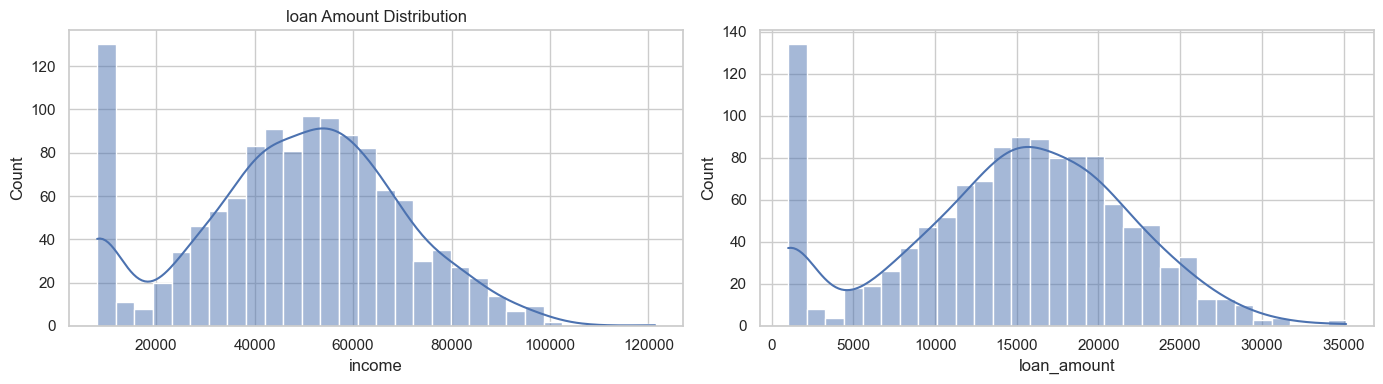

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='whitegrid')
fig, axes= plt.subplots(1, 2, figsize=(14, 4))
sns.histplot(df['income'], kde=True, bins=30, ax=axes[0])
axes[0].set_title("income Distribution")

sns.histplot(df['loan_amount'], kde=True, bins=30, ax=axes[1])
axes[0].set_title("loan Amount Distribution")
plt.tight_layout()
plt.show()

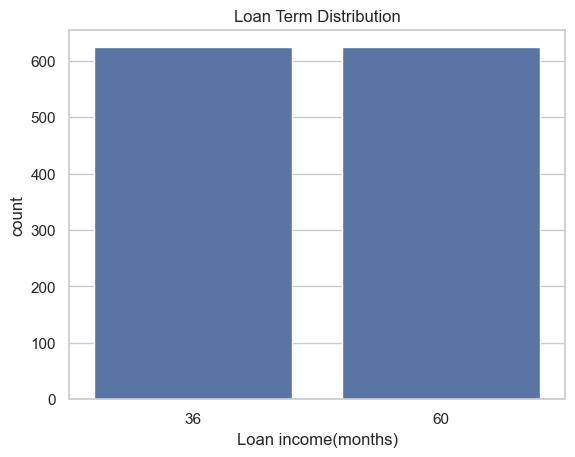

In [81]:
sns.countplot(x='term', data=df)
plt.title("Loan Term Distribution")
plt.xlabel("Loan income(months)")
plt.ylabel("count")
plt.show()

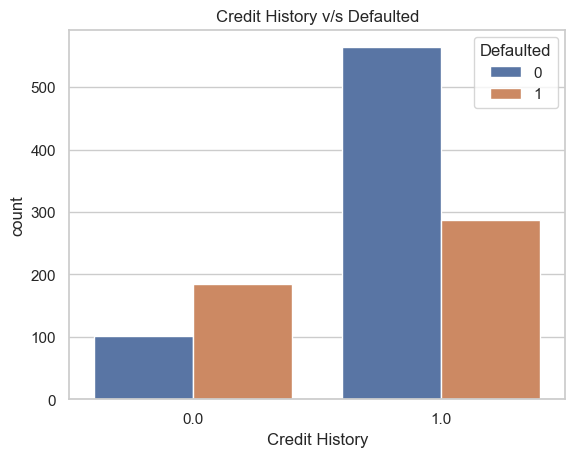

In [82]:
sns.countplot(x='credit_history',hue='defaulted', data=df)
plt.title("Credit History v/s Defaulted")
plt.xlabel("Credit History")
plt.ylabel("count")
plt.legend(title='Defaulted')
plt.show()

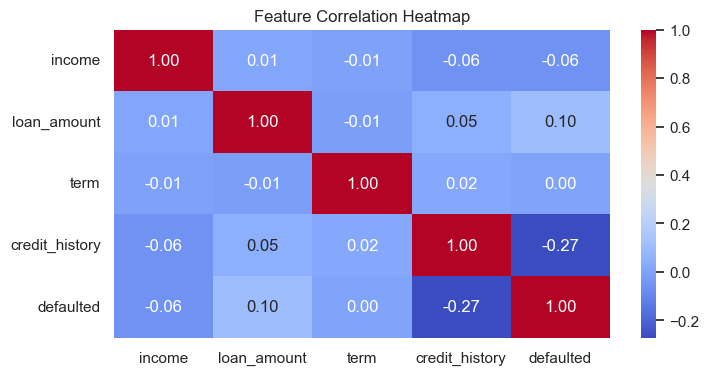

In [85]:
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(numeric_only=True),  annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

In [86]:
df['term_binary']= df['term']. apply(lambda x:1 if x==60 else 0)

In [23]:
import numpy as np
df['log_income']= np.log1p(df['income'])
df['log_loan_amount']= np.log1p(df['loan_amount'])

In [24]:
features=['log_income', 'log_loan_amount', 'credit_history']
target='defaulted'

In [66]:
from sklearn.preprocessing import StandardScaler
#df = pd.read_csv('C:/Users/ishwari/Desktop/ML Project/loan_data_1248_with_missing.csv')
# Create log features if not already present
#df['log_income'] = np.log(df['income'])
#df['log_loan_amount'] = np.log(df['loan_amount'])

scaler = StandardScaler()
scale_features = ['log_income', 'log_loan_amount']
df[scale_features] = scaler.fit_transform(df[scale_features])
df.head()

,income,loan_amount,term,credit_history,defaulted,log_income,log_loan_amount
0,60940.854754,17402.715471,60,1.0,1,0.545631,0.335185
1,49511.242579,6664.626123,36,0.0,0,0.025980,-1.651607
2,63658.393686,17985.281393,60,0.0,1,0.654782,0.403345
3,79414.537415,21001.173770,36,1.0,0,1.208074,0.724242
4,47785.239255,4037.586145,36,1.0,0,-0.062795,-2.689012


In [67]:
from sklearn.model_selection import train_test_split
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.2, random_state=42)

In [73]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [74]:
models ={
'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
'DecisionTreeClassifier':DecisionTreeClassifier(random_state=42),
'RandomForestClassifier':RandomForestClassifier(n_estimators=100, random_state=42)
}

In [75]:
for name, model in models.items():
    print(f"\nModel:{name}")
    
    pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),  # Handles NaNs
        ('scaler', StandardScaler()),                 # Scales data
        ('classifier', model)      
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))


Model:LogisticRegression
Accuracy: 0.6600
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.87      0.75       143
           1       0.69      0.37      0.48       107

    accuracy                           0.66       250
   macro avg       0.67      0.62      0.62       250
weighted avg       0.67      0.66      0.63       250


Model:DecisionTreeClassifier
Accuracy: 0.5960
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.68      0.66       143
           1       0.53      0.49      0.51       107

    accuracy                           0.60       250
   macro avg       0.58      0.58      0.58       250
weighted avg       0.59      0.60      0.59       250


Model:RandomForestClassifier
Accuracy: 0.6200
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.73      0.69       143
           1       0.57      0.

In [78]:
# FINAL CELL: View and save predictions for the last model in your loop

import pandas as pd

# Predict using the final pipeline from your loop
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]  # Probability of class '1' (bad credit)

# Create DataFrame to display actual vs predicted
results_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred,
    'Probability_of_Default': y_proba
})

results_df.reset_index(drop=True, inplace=True)

# Show first 10 predictions
print("\n🔍 Sample Predictions:")
print(results_df.head(10))

# Save to CSV
results_df.to_csv("credit_scoring_predictions.csv", index=False)
print("\n✅ Predictions saved to: credit_scoring_predictions.csv")



🔍 Sample Predictions:
   Actual  Predicted  Probability_of_Default
0       0          0                    0.42
1       1          0                    0.15
2       0          0                    0.33
3       0          0                    0.40
4       1          0                    0.35
5       0          0                    0.17
6       1          0                    0.25
7       0          0                    0.12
8       1          0                    0.27
9       1          1                    0.66

✅ Predictions saved to: credit_scoring_predictions.csv
